## WEEK 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
tcs = pd.read_csv("tcs.csv")
rel = pd.read_csv("Reliance.csv")
hdfc = pd.read_csv("HDFCBANK.NS.csv")
sbi = pd.read_csv("SBI Dataset.csv")

In [3]:
tcs.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2013-04-29,682.50,692.349976,682.500000,685.375000,555.524414,3968916,0.0,0.0
1,2013-04-30,684.00,691.000000,682.500000,689.200012,558.624695,4020570,0.0,0.0
2,2013-05-02,686.75,719.400024,686.750000,716.950012,581.117065,5630326,0.0,0.0
3,2013-05-03,713.00,723.625000,703.950012,709.250000,574.875916,3641790,0.0,0.0
4,2013-05-06,710.00,736.200012,710.000000,733.599976,594.612488,3727118,0.0,0.0


In [4]:
rel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0


In [5]:
hdfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,2.417746,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,2.413689,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,2.421803,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,2.405575,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,2.401519,189000.0


In [6]:
sbi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2000,22.267092,22.988886,22.101974,22.988886,15.844801,25152894.0
1,04-01-2000,22.988886,24.720245,22.535995,24.446625,16.849524,47648560.0
2,05-01-2000,23.493668,24.974997,23.116261,23.441774,16.156942,36396207.0
3,06-01-2000,23.776726,25.286358,23.776726,24.625893,16.973083,70573968.0
4,07-01-2000,24.673071,26.409147,24.059780,25.786425,17.772966,83453217.0


In [8]:
for df in [tcs, rel, hdfc, sbi]:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.sort_values('Date', inplace=True)


In [9]:
for name, df in zip(['TCS','Reliance','HDFC','SBI'], [tcs, rel, hdfc, sbi]):
    print(name)
    print(df.isna().sum())


TCS
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Reliance
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64
HDFC
Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64
SBI
Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64


In [10]:
def keep_price(df):
    if 'Adj Close' in df.columns:
        return df[['Date', 'Adj Close']].rename(columns={'Adj Close':'Price'})
    else:
        return df[['Date', 'Close']].rename(columns={'Close':'Price'})

tcs = keep_price(tcs)
rel = keep_price(rel)
hdfc = keep_price(hdfc)
sbi = keep_price(sbi)


In [ ]:
for name, df in zip(['TCS','Reliance','HDFC','SBI'], [tcs, rel, hdfc, sbi]):
    print(name)
    print(df.isna().sum())


In [15]:
tcs.dropna(inplace=True)
rel.dropna(inplace=True)
hdfc.dropna(inplace=True)
sbi.dropna(inplace=True)


In [16]:
portfolio = tcs.merge(rel, on='Date', how='inner', suffixes=('_TCS','_REL'))
portfolio = portfolio.merge(hdfc, on='Date', how='inner')
portfolio = portfolio.merge(sbi, on='Date', how='inner')

portfolio.columns = ['Date','TCS','Reliance','HDFC','SBI']

portfolio.head()


,Date,TCS,Reliance,HDFC,SBI
0,2015-11-18,1013.830811,436.671021,506.823273,221.892380
1,2015-11-19,1018.616150,447.563873,516.634888,224.562454
2,2015-11-20,1034.051636,453.357422,517.577454,223.687759
3,2015-11-23,1030.904419,456.661224,515.257507,223.457596
4,2015-11-24,1020.944702,463.340515,514.435852,222.260651


In [17]:
portfolio.info()
portfolio.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1232 non-null   datetime64[ns]
 1   TCS       1232 non-null   float64       
 2   Reliance  1232 non-null   float64       
 3   HDFC      1232 non-null   float64       
 4   SBI       1232 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 48.3 KB


,Date,TCS,Reliance,HDFC,SBI
count,1232,1232.000000,1232.000000,1232.000000,1232.000000
mean,2018-05-18 18:58:26.493506304,1529.280337,1024.471417,902.075661,245.445747
min,2015-11-18 00:00:00,922.371155,434.061554,455.614166,139.764572
25%,2017-02-15 18:00:00,1090.439819,540.720703,646.391709,211.436943
50%,2018-05-16 12:00:00,1564.062317,946.843903,940.300293,251.947593
75%,2019-08-19 06:00:00,1921.099365,1298.972321,1077.250122,278.561257
max,2020-11-17 00:00:00,2695.005615,2324.550049,1402.380493,350.519379
std,NaN,449.785411,466.231636,237.287392,47.178347


## WEEK 2

In [18]:
import numpy as np

prices = portfolio[['TCS','Reliance','HDFC','SBI']]

log_returns = np.log(prices / prices.shift(1))

log_returns.head()


,TCS,Reliance,HDFC,SBI
0,NaN,NaN,NaN,NaN
1,0.004709,0.024639,0.019174,0.011961
2,0.015040,0.012862,0.001823,-0.003903
3,-0.003048,0.007261,-0.004492,-0.001029
4,-0.009708,0.014520,-0.001596,-0.005371


In [21]:
volatility = log_returns.std()

volatility

TCS         0.016284
Reliance    0.019370
HDFC        0.014809
SBI         0.023712
dtype: float64

In [32]:
rolling_vol = log_returns.rolling(window=30).std()

rolling_vol


,TCS,Reliance,HDFC,SBI
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1227,0.019230,0.023922,0.018942,0.023221
1228,0.018895,0.024865,0.019066,0.022951
1229,0.018965,0.024880,0.019450,0.024068
1230,0.018920,0.024981,0.019398,0.023810


In [23]:
VaR_95 = log_returns.quantile(0.05)

VaR_95


TCS        -0.024609
Reliance   -0.025796
HDFC       -0.017939
SBI        -0.035954
Name: 0.05, dtype: float64

In [24]:
weights = np.array([0.25,0.25,0.25,0.25])


In [25]:
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()


In [26]:
num_simulations = 5000
num_days = 252   # 1 trading year

results = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    simulated_returns = np.random.multivariate_normal(
        mean_returns, cov_matrix, num_days
    )
    portfolio_path = np.cumprod(1 + simulated_returns.dot(weights))
    results[:, i] = portfolio_path


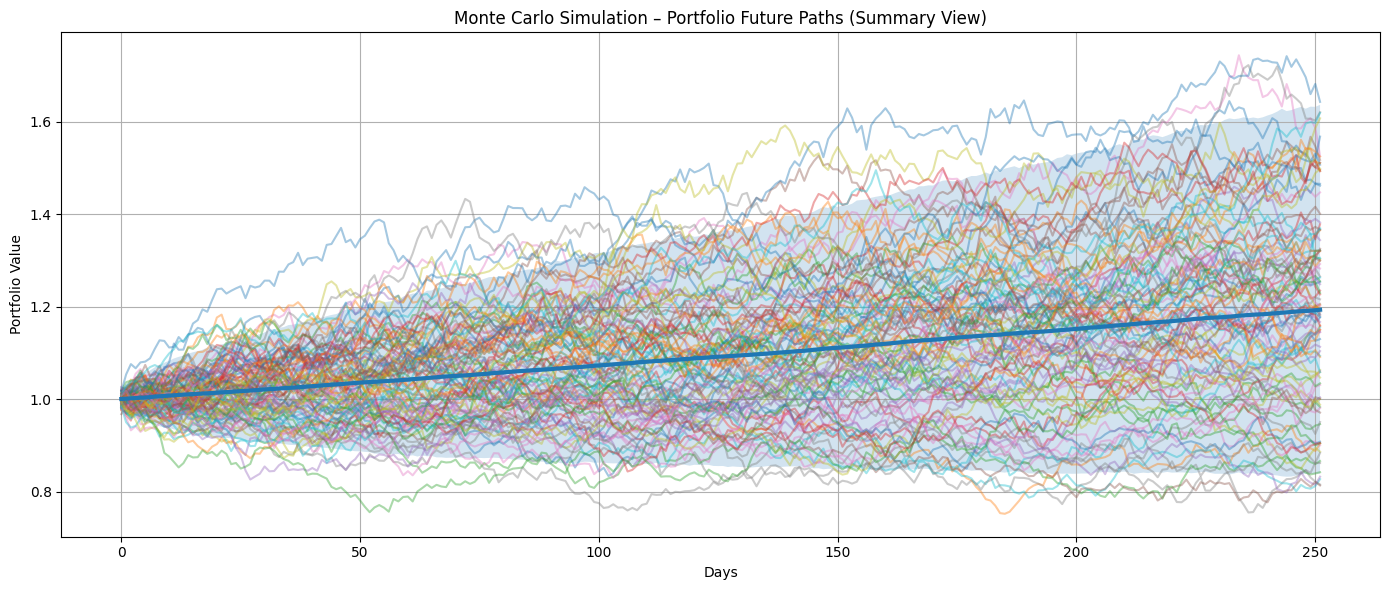

In [29]:
plt.figure(figsize=(14,6))

# Plot only first 100 paths for clarity
plt.plot(results[:, :100], alpha=0.4)

# Mean path
mean_path = results.mean(axis=1)
plt.plot(mean_path, linewidth=3)

# Percentile bands
p5 = np.percentile(results, 5, axis=1)
p95 = np.percentile(results, 95, axis=1)

plt.fill_between(range(num_days), p5, p95, alpha=0.2)

plt.title("Monte Carlo Simulation – Portfolio Future Paths (Summary View)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
portfolio.to_csv("portfolio_prices.csv", index=False)
log_returns.to_csv("portfolio_log_returns.csv", index=False)
rolling_vol.to_csv("portfolio_rolling_volatility.csv", index=False)
VaR_95.to_csv("portfolio_VaR95.csv")

In [38]:
rolling_vol_export = rolling_vol.copy()
rolling_vol_export["Date"] = portfolio["Date"]

rolling_vol_export.to_csv("portfolio_rolling_volatility.csv", index=False)


In [39]:
log_returns_export = log_returns.copy()
log_returns_export["Date"] = portfolio["Date"]

log_returns_export.to_csv("portfolio_log_returns.csv", index=False)


In [41]:
VaR_95_export = VaR_95.reset_index()
VaR_95_export.columns = ["Stock", "VaR_95"]

VaR_95_export.to_csv("portfolio_VaR95.csv", index=False)
